## **Неделя 3. Визуализация данных**
### Домашняя работа 

Форма для ответов: https://forms.gle/eD6Qq8915Jj96Exg7   
Крайний срок сдачи: 12.03.20

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### **Часть 1.** Анализ вероятности посупления в магистратуру.

Загрузим данные для анализа

In [12]:
admission_dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
admission_dataset.head(15)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


### Описание данных
Датасет содержит информацию о результатах тестов и успеваемости студентов. Целевой переменной(Chance of Admit) является вероятность поступления в магистратуру.

Подробности по ссылке ниже.

Источник: https://www.kaggle.com/mohansacharya/graduate-admissions/version/2#Admission_Predict_Ver1.1.csv

#### **Задание 1.** 
Какой из признаков является бинарным?

In [4]:
#your code here

In [5]:
admission_dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
admission_dataset['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

#### **Задание 2.** 
Как рейтинг университета влияет на шанс поступления? Вычислите абсолютную разницу средних шансов посутпления для студентов из университетов с самым низким и самым высоким рейтингом. 

In [7]:
#your code here

In [15]:
tmp1 = admission_dataset[admission_dataset['University Rating'] == 5.]
tmp2 = admission_dataset[admission_dataset['University Rating'] == 1.]

s1 = tmp1['Chance of Admit '].sum()*1.0/ tmp1['Chance of Admit '].count()
s2 = tmp2['Chance of Admit '].sum()*1.0/tmp2['Chance of Admit '].count()
print s1-s2

0.3260233682514102


#### **Задание 3.**
Попробуем оценить значимость признаков для поступления. Какой из признаков имеет наибольшую положительную корреляцию с шансом поступления. 

In [9]:
#your code here

In [10]:
admission_dataset.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


#### **Задание 4.**
Посмотрим на самый важный признак, найденный нами ранее. Постройте диаграмму рассеивания(scatter plot) между данным признаком и вероятностью поступления. Как изменяется влияние признака на вероятность поступления в зависимости от значения признака?


In [11]:
#your code here
admission_dataset.columns

Index([u'Serial No.', u'GRE Score', u'TOEFL Score', u'University Rating',
       u'SOP', u'LOR ', u'CGPA', u'Research', u'Chance of Admit '],
      dtype='object')

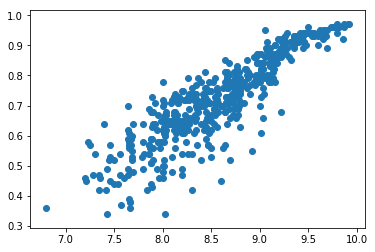

In [12]:
fig, ax = plt.subplots()
ax.scatter(admission_dataset['CGPA'],admission_dataset['Chance of Admit '])

#### **Задание 5.**
Построим распределение целевого признака. Куда смещено распределение шансов поступления для студентов, имеющих опыт исследований.

In [13]:
#your code here

(array([ 1.,  4.,  8.,  9., 19., 33., 52., 49., 44., 61.]),
 array([0.36 , 0.421, 0.482, 0.543, 0.604, 0.665, 0.726, 0.787, 0.848,
        0.909, 0.97 ]),
 <a list of 10 Patch objects>)

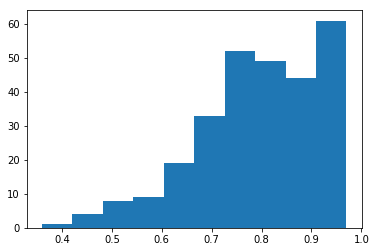

In [38]:
tmp_data = admission_dataset['Chance of Admit '][admission_dataset['Research']==1]#.value_counts()
#print tmp_data.values
plt.hist(tmp_data.values)

### **Часть 2.** Анализ нефтяных данных.

Загрузим данные

In [2]:
well_data = pd.read_csv('contest_train_df.csv',parse_dates = ['Date','Start_date'])

In [3]:
well_data.tail(4) # tail - нижние строки, head - верхние

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
2782437,129.0,2500.0,30.0,40.0,51.0,2190.0,9.0,50.0,73.0,2652.0,...,1,0,1.0,"3,5",625.0,1980-01-04,1979-12-28,6200,42565,1
2782438,130.6,2269.0,64.0,50.0,22.0,2393.0,5.0,50.0,73.0,2791.0,...,1,0,0.0,35,71.0,1980-01-04,1979-12-24,7465,52512,1
2782439,130.6,NaN,396.0,180.0,13.0,2000.0,95.0,200.0,73.0,2260.0,...,1,1,1.0,23,19.0,1980-01-04,1979-12-26,806,4545,1
2782440,129.0,1576.0,430.0,300.0,22.0,1762.0,97.0,500.0,73.0,2005.0,...,1,0,0.0,"7,8",673.0,1980-01-04,1979-12-20,3323,22188,1


Если таблица не помещается на экран, то можно попробовать транспонировать(повернуть) таблицу.

In [4]:
well_data.tail(100).T #T - операция транспонирования(transpose)

,2782341,2782342,2782343,2782344,2782345,2782346,2782347,2782348,2782349,2782350,...,2782431,2782432,2782433,2782434,2782435,2782436,2782437,2782438,2782439,2782440
Dnytr,129,146.8,146.8,129,130.6,129,129,129,150.2,129,...,127,129,129,129,129,130.6,129,130.6,130.6,129
H_din,2124,NaN,NaN,NaN,NaN,1987,NaN,2343,1980,NaN,...,NaN,NaN,1050,NaN,2186,2120,2500,2269,NaN,1576
Q_OIS,31,0,0,0,0,63,0,34,32,0,...,349,0,534,0,44,32,30,64,396,430
NomMoschn,40,70,36,45,125,50,45,45,45,140,...,63,45,300,40,45,58,40,50,180,300
Hperf,22,68,67,17,249.72,70,37,44,42,34,...,259.06,55,258.7,51,55,17,51,22,13,22
NomNapor,2477,2162,1906,2589,2011,1690,2340,2228,2224,2428,...,1733,2790,2000,2190,2790,2378,2190,2393,2000,1762
Water_cut,52,NaN,NaN,NaN,NaN,23,NaN,18,30,NaN,...,95,NaN,96,NaN,26,7,9,5,95,97
NomPodacha,35,100,35,50,250,59,44,50,60,200,...,125,35,700,50,35,60,50,50,200,500
Dnkt,66.2993,73,73,73,73,73,65.537,64.0727,73,73.64,...,73,75.7586,73.3769,73,75.7586,73,73,73,73,73
H_sp,2623,2235,2050,2619,2600,2292,2700,2794,2307,2550,...,1860,2900,2080,2652,2796,2480,2652,2791,2260,2005


#### **Задание 6.**
В какое время года чаще всего проводят мероприятие? Датой проведения мероприятия будем считать дату выхода на режим (VNR==1).

In [5]:
#your code here
well_data['Start_date'][0]

Timestamp('1965-06-21 00:00:00')

In [6]:
dic = {
    'winter':0,
    'spring':0,
    'summer':0,
    'autumn':0
}
for i in well_data['Date'][well_data['VNR']==1]:
    if i.month == 12 or i.month==1 or i.month==2:
        dic['winter'] += 1
    elif i.month==3 or i.month==4 or i.month==5:
        dic['spring'] += 1
    elif i.month==6 or i.month==7 or i.month==8:
        dic['summer'] += 1
    else:
        dic['autumn'] += 1


In [7]:
print dic
print dic.keys()[dic.values().index(max(dic.values()))]

{'autumn': 4044, 'spring': 3970, 'winter': 3702, 'summer': 3906}
autumn


#### **Задание 7.**
На одной скважине мероприятие может проводиться несколько раз. Какое максимальное число проведенных мероприятий на одной скважине. 

**Well_ID - идентификатор скважины, id - идентификатор мероприятия*

In [8]:
#your code here
well_data.groupby(['Well_ID'])['id'].count().max()

1651

#### **Задание 8.**
Посмотрим как улучшаются показатели скважины после проведения мероприятия. На сколько в среднем увеличивается Q_OIS на дату выхода на режим по сравнению со средними Q_OIS до начала мероприятия(Start_date)?

**Группировку нужно выполнять по признаку id.*


In [16]:
a = well_data.groupby(['id','State','VNR'])

In [17]:
a.first()

Dnytr   H_din   Q_OIS  NomMoschn   Hperf  NomNapor  \
id    State VNR                                                       
2     0     0    223.0  1765.0     0.0      552.0  548.00    1710.0   
      1     0    223.0  1776.0  1114.0      552.0  548.00    1710.0   
            1    223.0  1754.0  1104.0      552.0  548.00    1710.0   
4     0     0    130.6     NaN     0.0      238.6   12.40    1680.0   
      1     0    130.6     NaN   384.0      238.6   12.40    1680.0   
            1    130.6     NaN   450.0      238.6   12.40    1680.0   
5     0     0    130.6     NaN     0.0      238.6   12.40    1680.0   
      1     0    130.6     NaN   431.0      238.6   12.40    1680.0   
            1    130.6     NaN   304.0      238.6   12.40    1680.0   
7     0     0    222.9     NaN     0.0      552.0  553.00    1710.0   
      1     0    222.9     NaN  1152.0      552.0  553.00    1710.0   
            1    222.9     NaN  1118.0      552.0  553.00    1710.0   
10    0     0    222.8  2065.0     0.0      552.0  502.00    1710.0   
      1     0    222.8  1995.0  1073.0      552.0  502.00    1710.0   
            1    222.8  2055.0  1100.0      552.0  502.00    1710.0   
11    0     0    222.8     NaN     0.0      552.0  502.00    1710.0   
      1     0    222.8  2146.0  1055.0      552.0  502.00    1710.0   
            1    222.8  2084.0  1100.0      552.0  502.00    1710.0   
13    0     0    223.0  1546.0     0.0      552.0  474.00    1710.0   
      1     0    223.0  1514.0  1270.0      552.0  474.00    1710.0   
            1    223.0  1596.0  1415.0      552.0  474.00    1710.0   
14    0     0    223.0     NaN     0.0      552.0  474.00    1710.0   
      1     0    223.0  1535.0  1177.0      552.0  474.00    1710.0   
            1    223.0  1774.0  1387.0      552.0  474.00    1710.0   
15    0     0    223.0     NaN     0.0      552.0  474.00    1710.0   
      1     0    223.0  2003.0  1285.0      552.0  474.00    1710.0   
            1    223.0  1780.0  1144.0      552.0  474.00    1710.0   
21    0     0    159.6  2933.0     0.0       78.0     NaN    2060.0   
      1     0    159.6  2802.0   122.0       78.0     NaN    2060.0   
            1    159.6  2726.5    90.0       78.0     NaN    2060.0   
...                ...     ...     ...        ...     ...       ...   
60068 0     0    129.0     NaN     0.0       32.0   11.00    2134.0   
      1     0    129.0     NaN    33.0       32.0   11.00    2134.0   
            1    129.0     NaN    92.0       32.0   11.00    2134.0   
60070 0     0    129.0     NaN     0.0       80.0   11.00    2145.0   
      1     0    129.0     NaN   118.0       80.0   11.00    2145.0   
            1    129.0     NaN    63.0       80.0   11.00    2145.0   
60080 0     0    127.0     NaN     0.0       45.0   14.00    2026.0   
      1     0    127.0     NaN    41.0       45.0   14.00    2026.0   
            1    127.0     NaN    77.0       32.0   14.00    2093.0   
60081 0     0    127.0  2158.0     0.0       56.0   14.00    2093.0   
      1     0    127.0  2229.0    74.0       56.0   14.00    2093.0   
            1    132.0  1288.0   104.0       36.0   12.00    1814.0   
60083 0     0    127.0     NaN     0.0       56.0   14.00    2032.0   
      1     0    127.0     NaN    64.0       32.0   14.00    2093.0   
            1    127.0     NaN    47.0       56.0   14.00    2032.0   
60087 0     0    130.6     NaN     0.0       32.0   10.00    1722.0   
      1     0    130.6     NaN    15.0       32.0   10.00    1722.0   
            1    130.6  1569.0    80.0       32.0   10.00    1759.0   
60088 0     0    130.6     NaN     0.0       28.0   10.00    1352.0   
      1     0    130.6  1158.0    54.0       28.0   10.00    1352.0   
            1    130.6  1485.0    76.0       28.0   10.00    1352.0   
60091 0     0    130.6  1786.0     0.0       45.0   10.00    1872.0   
      1     0    130.6  1860.0    56.0       45.0   10.00    1872.0   
            1    130.6  1741.0    59.0   